# outliers

In [73]:
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [74]:
df = pd.read_csv("house pricing delhi- MagicBricks (1).csv")

In [28]:
df.drop('Locality',axis=1,inplace=True)

In [29]:
df

,Area,BHK,Bathroom,Furnishing,Location,District,Parking,Status,Transaction,Type,Per_Sqft,Price
0,950.0,2,2.0,Furnished,Karol Bagh,Central Delhi,1.0,Ready_to_move,Resale,Apartment,8761.0,12500000
1,535.0,2,1.0,Furnished,Karol Bagh,Central Delhi,1.0,Ready_to_move,New_Property,Apartment,7290.0,3900000
2,1280.0,3,3.0,Furnished,Karol Bagh,Central Delhi,2.0,Ready_to_move,Resale,Builder_Floor,14092.0,15000000
3,1135.0,3,3.0,Furnished,Karol Bagh,Central Delhi,2.0,Almost_ready,Resale,Apartment,22222.0,25000000
4,1135.0,3,3.0,Furnished,Karol Bagh,Central Delhi,2.0,Almost_ready,Resale,Apartment,22222.0,25000000
...,...,...,...,...,...,...,...,...,...,...,...,...
1209,4688.0,5,4.0,Unfurnished,Patel Nagar,West Delhi,1.0,Almost_ready,New_Property,Apartment,28797.0,135000000
1210,3901.0,4,4.0,Unfurnished,Patel Nagar,West Delhi,1.0,Almost_ready,New_Property,Apartment,23840.0,93000000
1211,2306.0,3,3.0,Unfurnished,Patel Nagar,West Delhi,1.0,Almost_ready,New_Property,Apartment,24718.0,57000000
1212,675.0,2,1.0,Unfurnished,Uttam Nagar,West Delhi,1.0,Ready_to_move,Resale,Builder_Floor,5794.0,2900000


In [30]:
df.Price

0        12500000
1         3900000
2        15000000
3        25000000
4        25000000
          ...    
1209    135000000
1210     93000000
1211     57000000
1212      2900000
1213      3200000
Name: Price, Length: 1214, dtype: int64

<Axes: xlabel='Price'>

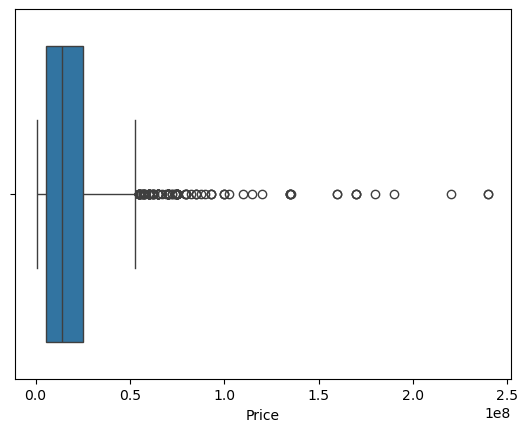

In [31]:
# Check outliers with boxplot

sns.boxplot(df.Price,orient='h')

<Axes: xlabel='Area', ylabel='Price'>

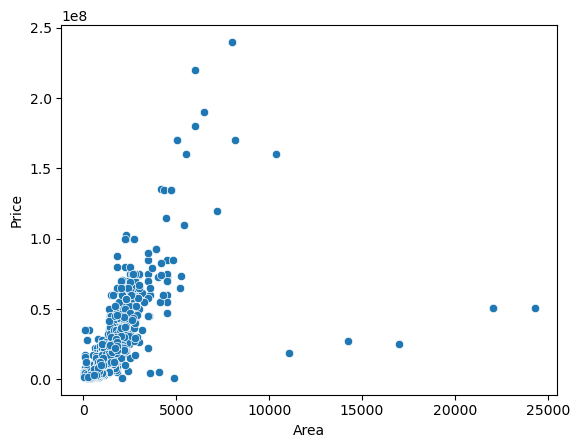

In [32]:
sns.scatterplot(x=df.Area,y=df.Price)

In [13]:
df.describe()

,Area,BHK,Bathroom,Parking,Per_Sqft,Price
count,1214.000000,1214.000000,1212.000000,1182.000000,973.000000,1.214000e+03
mean,1451.850751,2.778418,2.523927,1.708122,15574.885920,2.079898e+07
std,1586.472855,0.946811,1.017723,5.717177,21574.389007,2.561308e+07
min,28.000000,1.000000,1.000000,1.000000,1259.000000,1.000000e+06
25%,800.000000,2.000000,2.000000,1.000000,6154.000000,5.600000e+06
50%,1150.000000,3.000000,2.000000,1.000000,10838.000000,1.400000e+07
75%,1620.000000,3.000000,3.000000,2.000000,17647.000000,2.500000e+07
max,24300.000000,10.000000,7.000000,114.000000,183333.000000,2.400000e+08


In [33]:
df

,Area,BHK,Bathroom,Furnishing,Location,District,Parking,Status,Transaction,Type,Per_Sqft,Price
0,950.0,2,2.0,Furnished,Karol Bagh,Central Delhi,1.0,Ready_to_move,Resale,Apartment,8761.0,12500000
1,535.0,2,1.0,Furnished,Karol Bagh,Central Delhi,1.0,Ready_to_move,New_Property,Apartment,7290.0,3900000
2,1280.0,3,3.0,Furnished,Karol Bagh,Central Delhi,2.0,Ready_to_move,Resale,Builder_Floor,14092.0,15000000
3,1135.0,3,3.0,Furnished,Karol Bagh,Central Delhi,2.0,Almost_ready,Resale,Apartment,22222.0,25000000
4,1135.0,3,3.0,Furnished,Karol Bagh,Central Delhi,2.0,Almost_ready,Resale,Apartment,22222.0,25000000
...,...,...,...,...,...,...,...,...,...,...,...,...
1209,4688.0,5,4.0,Unfurnished,Patel Nagar,West Delhi,1.0,Almost_ready,New_Property,Apartment,28797.0,135000000
1210,3901.0,4,4.0,Unfurnished,Patel Nagar,West Delhi,1.0,Almost_ready,New_Property,Apartment,23840.0,93000000
1211,2306.0,3,3.0,Unfurnished,Patel Nagar,West Delhi,1.0,Almost_ready,New_Property,Apartment,24718.0,57000000
1212,675.0,2,1.0,Unfurnished,Uttam Nagar,West Delhi,1.0,Ready_to_move,Resale,Builder_Floor,5794.0,2900000


In [34]:
# STEP 1 : to find out Q1 and Q3

Q1,Q3 = df.Price.quantile([0.25,0.75])

In [35]:
Q1,Q3

(5600000.0, 25000000.0)

In [36]:
# Step 2 : Finding IQR 

IQR = Q3 - Q1

In [37]:
IQR

19400000.0

In [38]:
UL = Q3 + 1.5 * (IQR)
LL = Q1 - 1.5 * (IQR)

In [39]:
LL,UL

(-23500000.0, 54100000.0)

In [40]:
# How to Replace Outliers.

df.Price = np.where(df.Price>UL,UL,df.Price)

<Axes: xlabel='Price'>

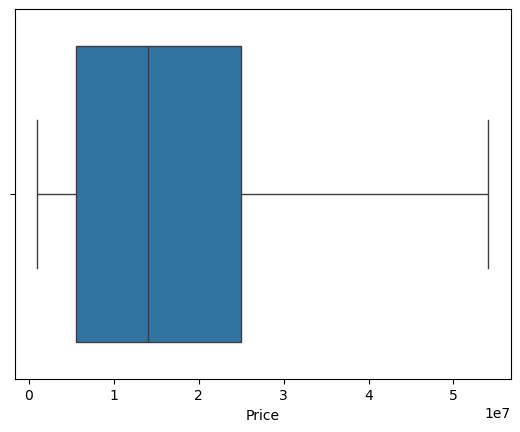

In [41]:
sns.boxplot(df.Price,orient='h')

<Axes: xlabel='Area', ylabel='Price'>

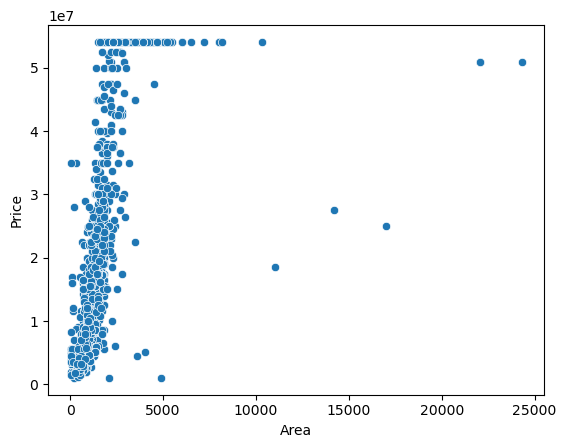

In [42]:
sns.scatterplot(x=df.Area,y=df.Price)

In [43]:
Q1,Q3  = df.Area.quantile([0.25,0.75])

In [44]:
IQR = Q3 - Q1

In [45]:
IQR

820.0

In [46]:
UL = Q3 + 1.5 * (IQR)

In [47]:
UL

2850.0

In [49]:
df.Area = np.where(df.Area>UL,UL,df.Area)

<Axes: xlabel='Area', ylabel='Price'>

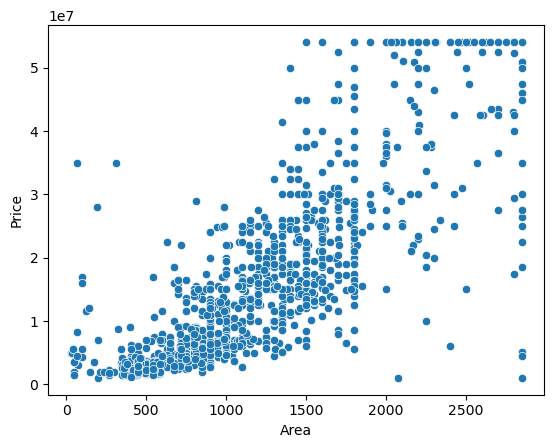

In [50]:
sns.scatterplot(x=df.Area,y=df.Price)

# Data Visualizations with Pandas

In [51]:
df

,Area,BHK,Bathroom,Furnishing,Location,District,Parking,Status,Transaction,Type,Per_Sqft,Price
0,950.0,2,2.0,Furnished,Karol Bagh,Central Delhi,1.0,Ready_to_move,Resale,Apartment,8761.0,12500000.0
1,535.0,2,1.0,Furnished,Karol Bagh,Central Delhi,1.0,Ready_to_move,New_Property,Apartment,7290.0,3900000.0
2,1280.0,3,3.0,Furnished,Karol Bagh,Central Delhi,2.0,Ready_to_move,Resale,Builder_Floor,14092.0,15000000.0
3,1135.0,3,3.0,Furnished,Karol Bagh,Central Delhi,2.0,Almost_ready,Resale,Apartment,22222.0,25000000.0
4,1135.0,3,3.0,Furnished,Karol Bagh,Central Delhi,2.0,Almost_ready,Resale,Apartment,22222.0,25000000.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1209,2850.0,5,4.0,Unfurnished,Patel Nagar,West Delhi,1.0,Almost_ready,New_Property,Apartment,28797.0,54100000.0
1210,2850.0,4,4.0,Unfurnished,Patel Nagar,West Delhi,1.0,Almost_ready,New_Property,Apartment,23840.0,54100000.0
1211,2306.0,3,3.0,Unfurnished,Patel Nagar,West Delhi,1.0,Almost_ready,New_Property,Apartment,24718.0,54100000.0
1212,675.0,2,1.0,Unfurnished,Uttam Nagar,West Delhi,1.0,Ready_to_move,Resale,Builder_Floor,5794.0,2900000.0


<Axes: xlabel='Location'>

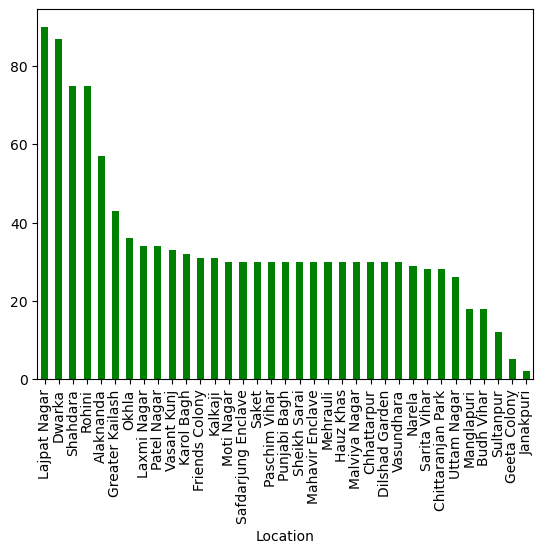

In [54]:
df.Location.value_counts().plot(kind='bar',color='g')

<Axes: ylabel='count'>

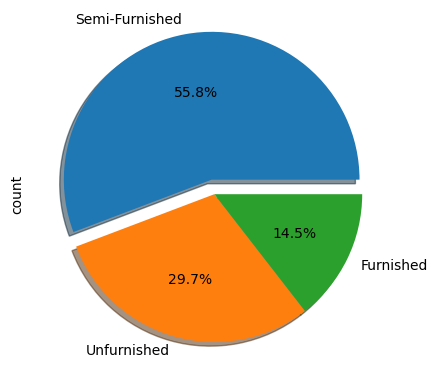

In [70]:
df.Furnishing.value_counts().plot(kind='pie',autopct='%1.1f%%',shadow=True,explode=[0.1,0,0])

<Axes: >

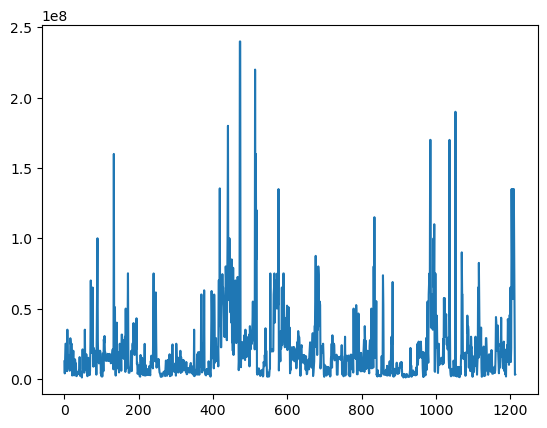

In [75]:
df.Price.plot()

In [78]:
df[df.Price==df.Price.max()]

,Area,BHK,Bathroom,Furnishing,Location,District,Locality,Parking,Status,Transaction,Type,Per_Sqft,Price
472,8000.0,4,5.0,Semi-Furnished,Lajpat Nagar,South Delhi,Lajpat Nagar,1.0,Ready_to_move,New_Property,Builder_Floor,22000.0,240000000
473,8000.0,4,5.0,Semi-Furnished,Lajpat Nagar,South Delhi,Lajpat Nagar,1.0,Ready_to_move,New_Property,Builder_Floor,20000.0,240000000


In [82]:
df[df.Price>10000000]

,Area,BHK,Bathroom,Furnishing,Location,District,Locality,Parking,Status,Transaction,Type,Per_Sqft,Price
0,950.0,2,2.0,Furnished,Karol Bagh,Central Delhi,"DDA MIG Flats Prasad Nagar Phase 2, Prasad Nag...",1.0,Ready_to_move,Resale,Apartment,8761.0,12500000
2,1280.0,3,3.0,Furnished,Karol Bagh,Central Delhi,Karol Bagh,2.0,Ready_to_move,Resale,Builder_Floor,14092.0,15000000
3,1135.0,3,3.0,Furnished,Karol Bagh,Central Delhi,"The Amaryllis, Karol Bagh",2.0,Almost_ready,Resale,Apartment,22222.0,25000000
4,1135.0,3,3.0,Furnished,Karol Bagh,Central Delhi,"The Amaryllis, Karol Bagh",2.0,Almost_ready,Resale,Apartment,22222.0,25000000
5,1135.0,3,3.0,Furnished,Karol Bagh,Central Delhi,"The Amaryllis, Karol Bagh",2.0,Almost_ready,Resale,Apartment,14366.0,25000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1207,3901.0,4,4.0,Unfurnished,Patel Nagar,West Delhi,"The Leela Sky Villas, Patel Nagar",1.0,Almost_ready,New_Property,Apartment,23840.0,93000000
1208,2306.0,3,3.0,Unfurnished,Patel Nagar,West Delhi,"The Leela Sky Villas, Patel Nagar",1.0,Almost_ready,New_Property,Apartment,24718.0,57000000
1209,4688.0,5,4.0,Unfurnished,Patel Nagar,West Delhi,"The Leela Sky Villas, Patel Nagar",1.0,Almost_ready,New_Property,Apartment,28797.0,135000000
1210,3901.0,4,4.0,Unfurnished,Patel Nagar,West Delhi,"The Leela Sky Villas, Patel Nagar",1.0,Almost_ready,New_Property,Apartment,23840.0,93000000
